In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
data = pd.read_csv("income_evaluation.csv")
data.info()

data.shape
#veri setimizdeki gelirlerin toplamını görüntüledik.
data.income.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2    fnlwgt         32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


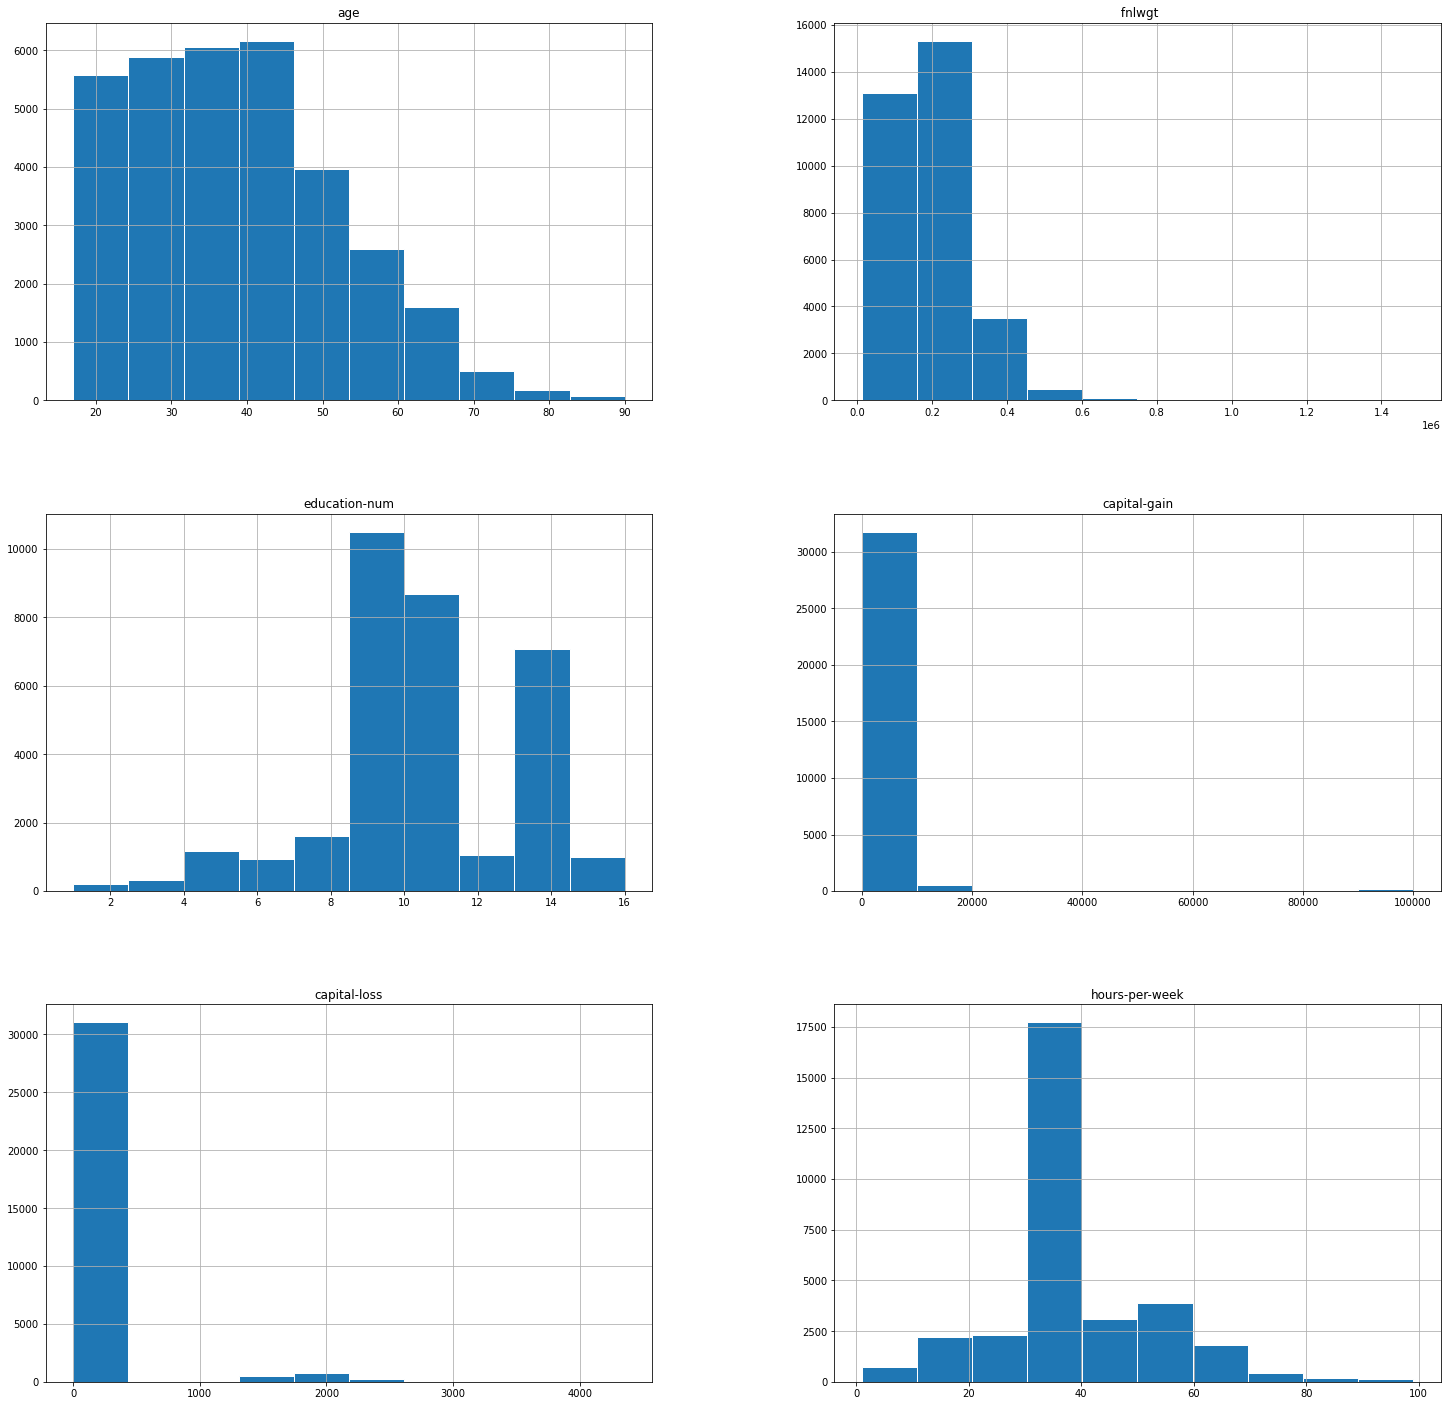

In [4]:
data.hist(figsize=(25,25), ec='w')
plt.show()

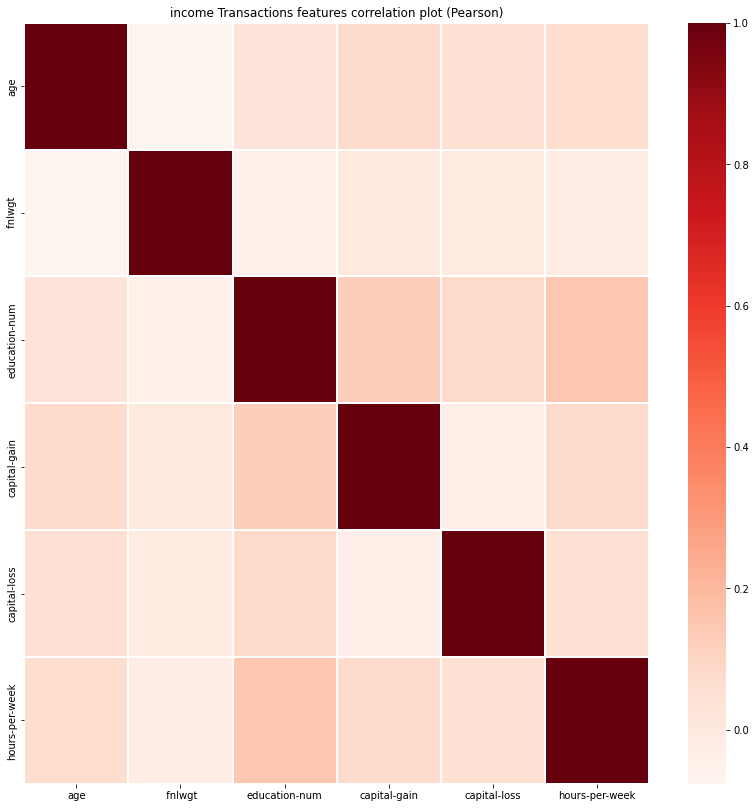

In [5]:
plt.figure(figsize = (14,14))
plt.title('income Transactions features correlation plot (Pearson)')
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

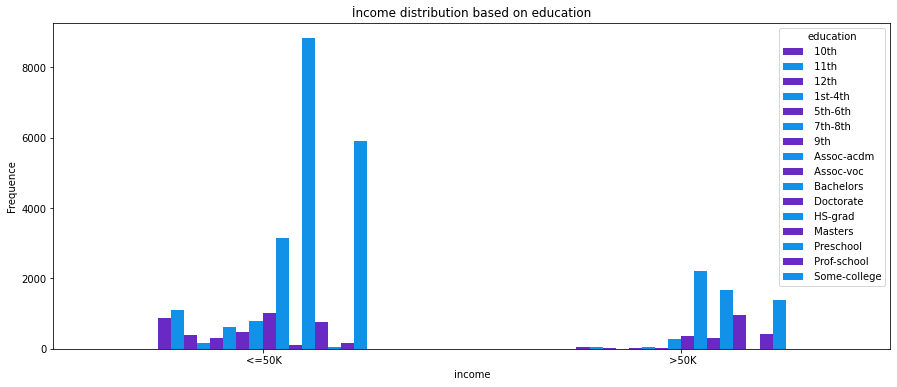

In [6]:
pd.crosstab(data.income,data.education).plot(kind="bar",figsize=(15,6),color=['#6929c4','#1192e8'])
plt.title('İncome distribution based on education')
plt.xticks(rotation=0)
plt.ylabel('Frequence')
plt.show()

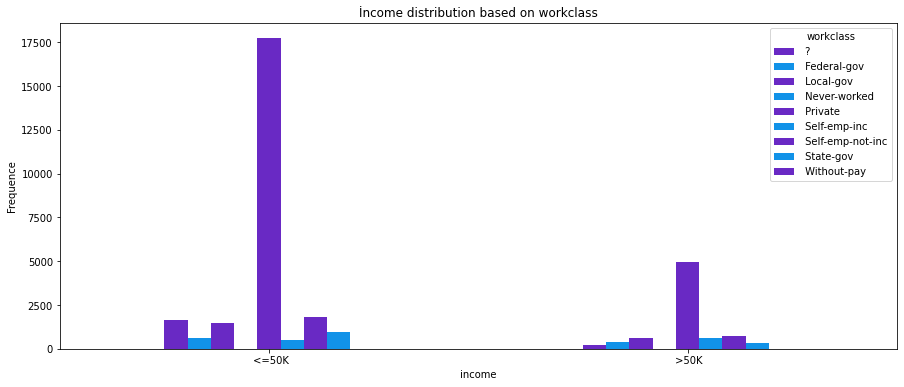

In [7]:
pd.crosstab(data.income,data.workclass).plot(kind="bar",figsize=(15,6),color=['#6929c4','#1192e8'])
plt.title('İncome distribution based on workclass')
plt.xticks(rotation=0)
plt.ylabel('Frequence')
plt.show()

In [8]:
#Converts strings to value integer
le = LabelEncoder()
data["workclass"] = le.fit_transform(data["workclass"])
data["education"] = le.fit_transform(data["education"])
data["marital-status"] = le.fit_transform(data["marital-status"])
data["occupation"] = le.fit_transform(data["occupation"])
data["relationship"] = le.fit_transform(data["relationship"])
data["race"] = le.fit_transform(data["race"])
data["sex"] = le.fit_transform(data["sex"])
data["native-country"] = le.fit_transform(data["native-country"])
data["income"] = le.fit_transform(data["income"])
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [9]:
#checking for missing values
data.isnull().sum()


age               0
workclass         0
 fnlwgt           0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [10]:
#Normalize
from sklearn.preprocessing import LabelEncoder, minmax_scale

for column in data.columns.values:
    data[column] = minmax_scale(data[column], feature_range=(0,1), axis=0)

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.301370,0.875,0.044302,0.600000,0.800000,0.666667,0.071429,0.2,1.0,1.0,0.02174,0.0,0.397959,0.951220,0.0
1,0.452055,0.750,0.048238,0.600000,0.800000,0.333333,0.285714,0.0,1.0,1.0,0.00000,0.0,0.122449,0.951220,0.0
2,0.287671,0.500,0.138113,0.733333,0.533333,0.000000,0.428571,0.2,1.0,1.0,0.00000,0.0,0.397959,0.951220,0.0
3,0.493151,0.500,0.151068,0.066667,0.400000,0.333333,0.428571,0.0,0.5,1.0,0.00000,0.0,0.397959,0.951220,0.0
4,0.150685,0.500,0.221488,0.600000,0.800000,0.333333,0.714286,1.0,0.5,0.0,0.00000,0.0,0.397959,0.121951,0.0


In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# bağımlı ve bağımsız değişkenlerimizi oluşturduk
X = data.drop(["income"],axis=1)
y = data["income"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

print("Train size: ",len(X_train))
print("Test size:", len(X_test))


Train size:  22792
Test size: 9769


Text(0.5, 1.0, 'Frequency distribution of income variable')

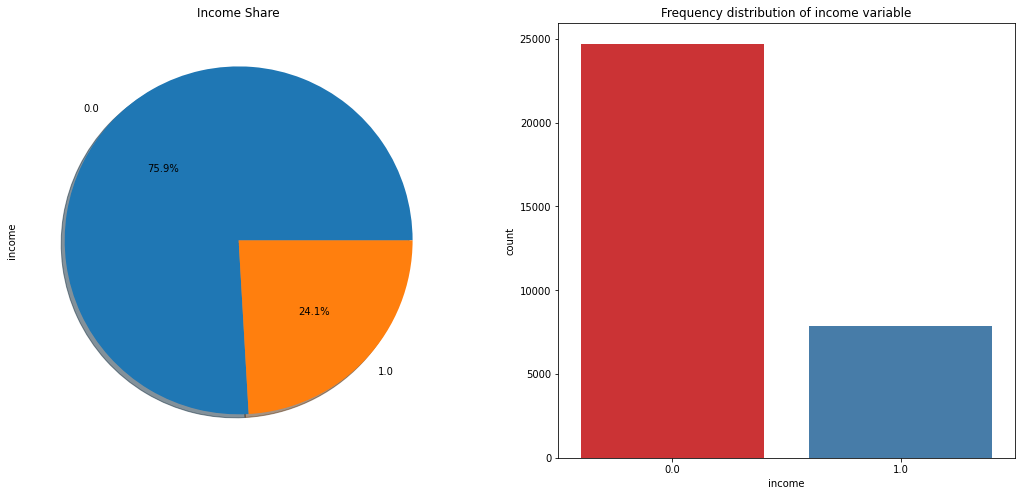

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = data['income'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Income Share')

#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="income", data=data, palette="Set1")
ax[1].set_title("Frequency distribution of income variable")

0.0    24720
1.0     7841
Name: income, dtype: int64

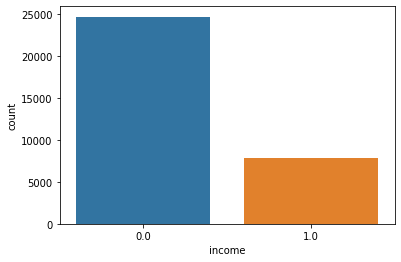

In [13]:
#Data Visualization of Target(income) Variables
sns.countplot(x="income",data=data)

data.income.value_counts()


In [14]:
#Random Under Sampling

data = data.sample(frac=1)
income_1 = data.loc[data['income'] == 1]
income_0 = data.loc[data["income"] == 0][:7841]
dist= pd.concat([income_1, income_0])


0.0    7841
1.0    7841
Name: income, dtype: int64

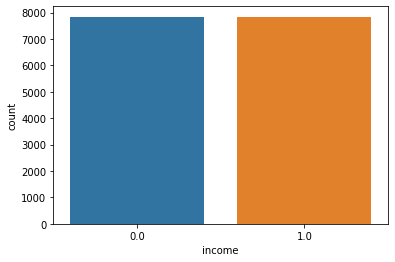

In [15]:
from sklearn.utils import shuffle

#Shuffle
data_frame = shuffle(dist,random_state=42)
data = data_frame

#Data Visualization of Target(income) Variables
sns.countplot(x="income",data=data)
data.income.value_counts()

Number of mislabeled points out of a total 9769 points : 1893
Accuracy:
 0.806223769065411

Confusion Matrix:
 [[7057  350]
 [1543  819]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.95      0.88      7407
         1.0       0.70      0.35      0.46      2362

    accuracy                           0.81      9769
   macro avg       0.76      0.65      0.67      9769
weighted avg       0.79      0.81      0.78      9769



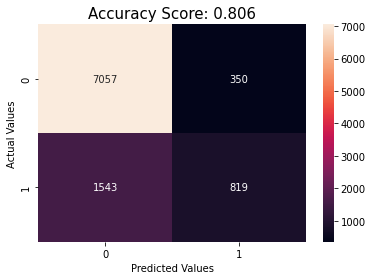

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb=GaussianNB()
y_pred = gnb.fit(X_train,y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))
print("Accuracy:\n", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as cm

predictions = gnb.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

Accuracy:
 0.8515712969597707

Confusion Matrix:
 [[6930  477]
 [ 973 1389]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      7407
         1.0       0.74      0.59      0.66      2362

    accuracy                           0.85      9769
   macro avg       0.81      0.76      0.78      9769
weighted avg       0.84      0.85      0.85      9769



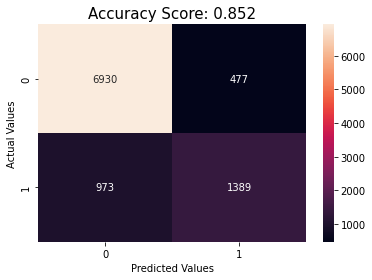

In [17]:
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Accuracy:\n", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as cm

predictions = rf.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()



In [18]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Accuracy:\n", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))




Accuracy:
 0.8515712969597707

Confusion Matrix:
 [[6930  477]
 [ 973 1389]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      7407
         1.0       0.74      0.59      0.66      2362

    accuracy                           0.85      9769
   macro avg       0.81      0.76      0.78      9769
weighted avg       0.84      0.85      0.85      9769



Accuracy:
 0.8515712969597707

Confusion Matrix:
 [[6930  477]
 [ 973 1389]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      7407
         1.0       0.74      0.59      0.66      2362

    accuracy                           0.85      9769
   macro avg       0.81      0.76      0.78      9769
weighted avg       0.84      0.85      0.85      9769



<AxesSubplot:>

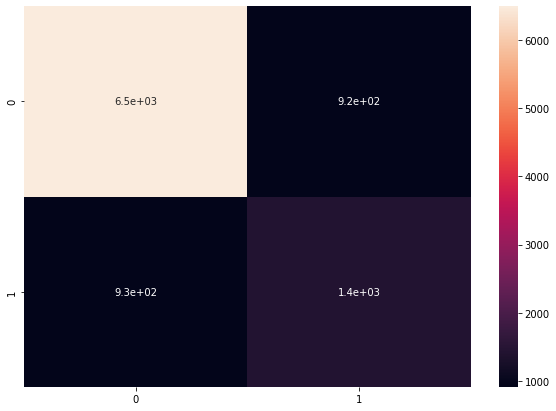

In [19]:

rfc = DecisionTreeClassifier()
rfc.fit(X_train, y_train)
rfc_results = result = rfc.predict(X_test)

print("Accuracy:\n", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

rfc_cm = confusion_matrix(y_test, rfc_results)
rfc_cm = pd.DataFrame(rfc_cm)
plt.figure(figsize = (10,7))
sns.heatmap(rfc_cm, annot=True)

In [20]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split

cnb = CategoricalNB()
model = cnb.fit(X_train, y_train)
predicted = model.predict(X_test)


print("Accuracy:\n", accuracy_score(y_test, predicted))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predicted))
print("\nClassification Report:\n", classification_report(y_test, predicted))



Accuracy:
 0.7698843279762514

Confusion Matrix:
 [[7367   40]
 [2208  154]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.99      0.87      7407
         1.0       0.79      0.07      0.12      2362

    accuracy                           0.77      9769
   macro avg       0.78      0.53      0.49      9769
weighted avg       0.78      0.77      0.69      9769



In [21]:
from sklearn.ensemble import AdaBoostClassifier
aBc = AdaBoostClassifier()
model = aBc.fit(X_train, y_train)
predicted = model.predict(X_test)


print("Accuracy:\n", accuracy_score(y_test, predicted))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predicted))
print("\nClassification Report:\n", classification_report(y_test, predicted))

Accuracy:
 0.8595557375371071

Confusion Matrix:
 [[6920  487]
 [ 885 1477]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      7407
         1.0       0.75      0.63      0.68      2362

    accuracy                           0.86      9769
   macro avg       0.82      0.78      0.80      9769
weighted avg       0.85      0.86      0.85      9769



In [22]:
from sklearn.model_selection import cross_val_score,cross_val_predict
scores = cross_val_score(model, X, y, cv=10)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.86 accuracy with a standard deviation of 0.01
